# 🧠 Problem Statement:

Build a machine learning model that correctly identifies digits (0-9) from grayscale images of hand-written digits.

# 🎯 Business Objective:

Develop a high-accuracy digit classifier for hand-written images (like those from the MNIST dataset).

# 📌 Business Constraints:

- Accuracy is a key metric.

- Model should be reasonably fast and lightweight for real-time deployment.

- Training time should be efficient due to large dataset size.

# ------------------ Imports ------------------

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px

# ------------------ Load Dataset ------------------

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# ------------------ Data Preprocessing ------------------

In [4]:
X = train.drop('label', axis=1)
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test)

# ------------------ PCA ------------------

In [6]:
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
test_pca = pca.transform(test_scaled)

# ------------------ Model Training ------------------

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

# ------------------ Evaluation ------------------

In [8]:
y_pred = knn.predict(X_test_pca)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

🔍 Accuracy: 0.950952380952381
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       816
           1       0.96      0.99      0.98       909
           2       0.96      0.94      0.95       846
           3       0.94      0.94      0.94       937
           4       0.96      0.95      0.96       839
           5       0.93      0.93      0.93       702
           6       0.96      0.98      0.97       785
           7       0.96      0.93      0.94       893
           8       0.96      0.92      0.94       835
           9       0.93      0.93      0.93       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



# Confusion Matrix

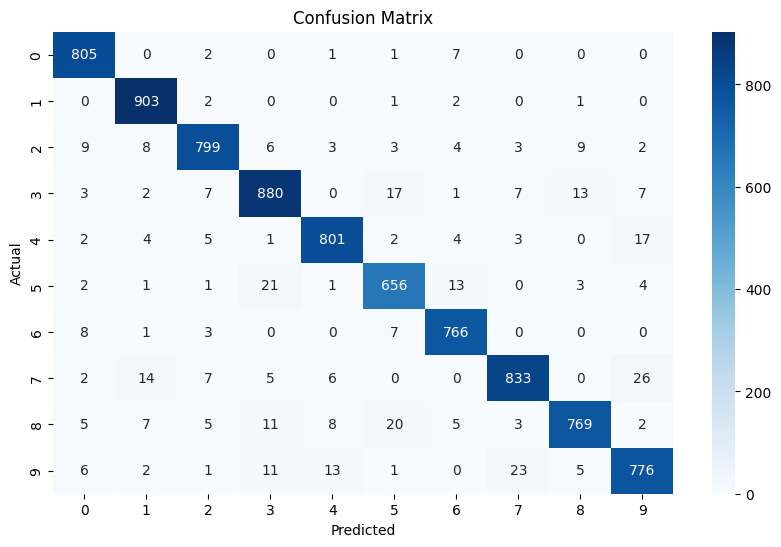

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------ Visualization: PCA 2D ------------------

In [ ]:
pca_2d = PCA(n_components=2)
X_vis_2d = pca_2d.fit_transform(X_train_scaled)
fig_2d = px.scatter(x=X_vis_2d[:, 0], y=X_vis_2d[:, 1], color=y_train.astype(str),
                    title="PCA 2D Visualization of Digits")
fig_2d.show()

# ------------------ Visualization: PCA 3D ------------------

In [ ]:
pca_3d = PCA(n_components=3)
X_vis_3d = pca_3d.fit_transform(X_train_scaled)
fig_3d = px.scatter_3d(x=X_vis_3d[:, 0], y=X_vis_3d[:, 1], z=X_vis_3d[:, 2],
                       color=y_train.astype(str), title="PCA 3D Visualization of Digits")
fig_3d.update_layout(margin=dict(l=20, r=20, t=40, b=20))
fig_3d.show()

# ------------------ PCA Explained Variance ------------------

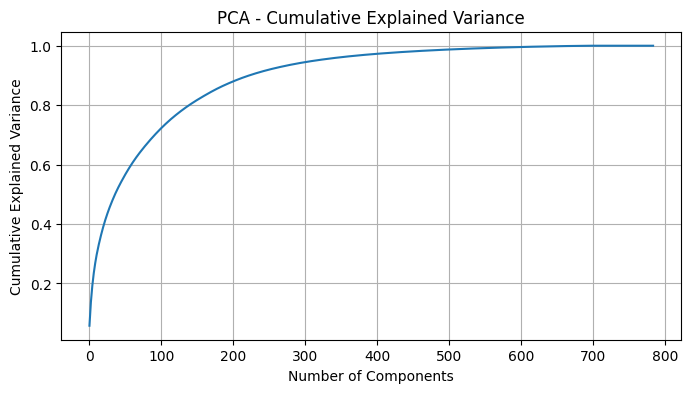

In [12]:
pca_full = PCA().fit(X_train_scaled)
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()

# ------------------ Generate Submission File ------------------

In [13]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(test_pca) + 1),
    "Label": knn.predict(test_pca)
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv generated successfully.")

✅ submission.csv generated successfully.


# ------------------ Conclusion ------------------

# 📌 Conclusion:

- PCA successfully reduced dimensions while retaining maximum variance.

- KNN performed reasonably well on reduced-dimensional data.

- Final model can now be used for deployment or further optimization with GridSearchCV or alternative classifiers.